## Dependency

In [89]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

## Constants

In [90]:
CLASS_LABELS = ("0", "1")
CLASS_NAMES = ["Artifact", "No Artifact"]

## Path

In [91]:
root_path = os.path.abspath(os.path.join('..'))
data_path = os.path.join(root_path, "data")
models_path = os.path.join(root_path, "models")

## Load Data

In [92]:
def load_dataset_as_df(data_dir, class_labels):
    supported_formats = ('.png', '.jpg', '.jpeg')
    records = []

    for label in class_labels:
        folder = os.path.join(data_dir, label)
        if not os.path.isdir(folder):
            continue
        for fname in os.listdir(folder):
            if fname.lower().endswith(supported_formats): 
                records.append({
                    'image_path': os.path.join(folder, fname),
                    'label': int(label)
                })

    return pd.DataFrame(records)

In [93]:
train_df = load_dataset_as_df(os.path.join(data_path, "train"), CLASS_LABELS)
test_df = load_dataset_as_df(os.path.join(data_path, "test"), CLASS_LABELS)

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (1800, 2)
Test shape: (200, 2)


## Exploratory data analysis

### Show some images

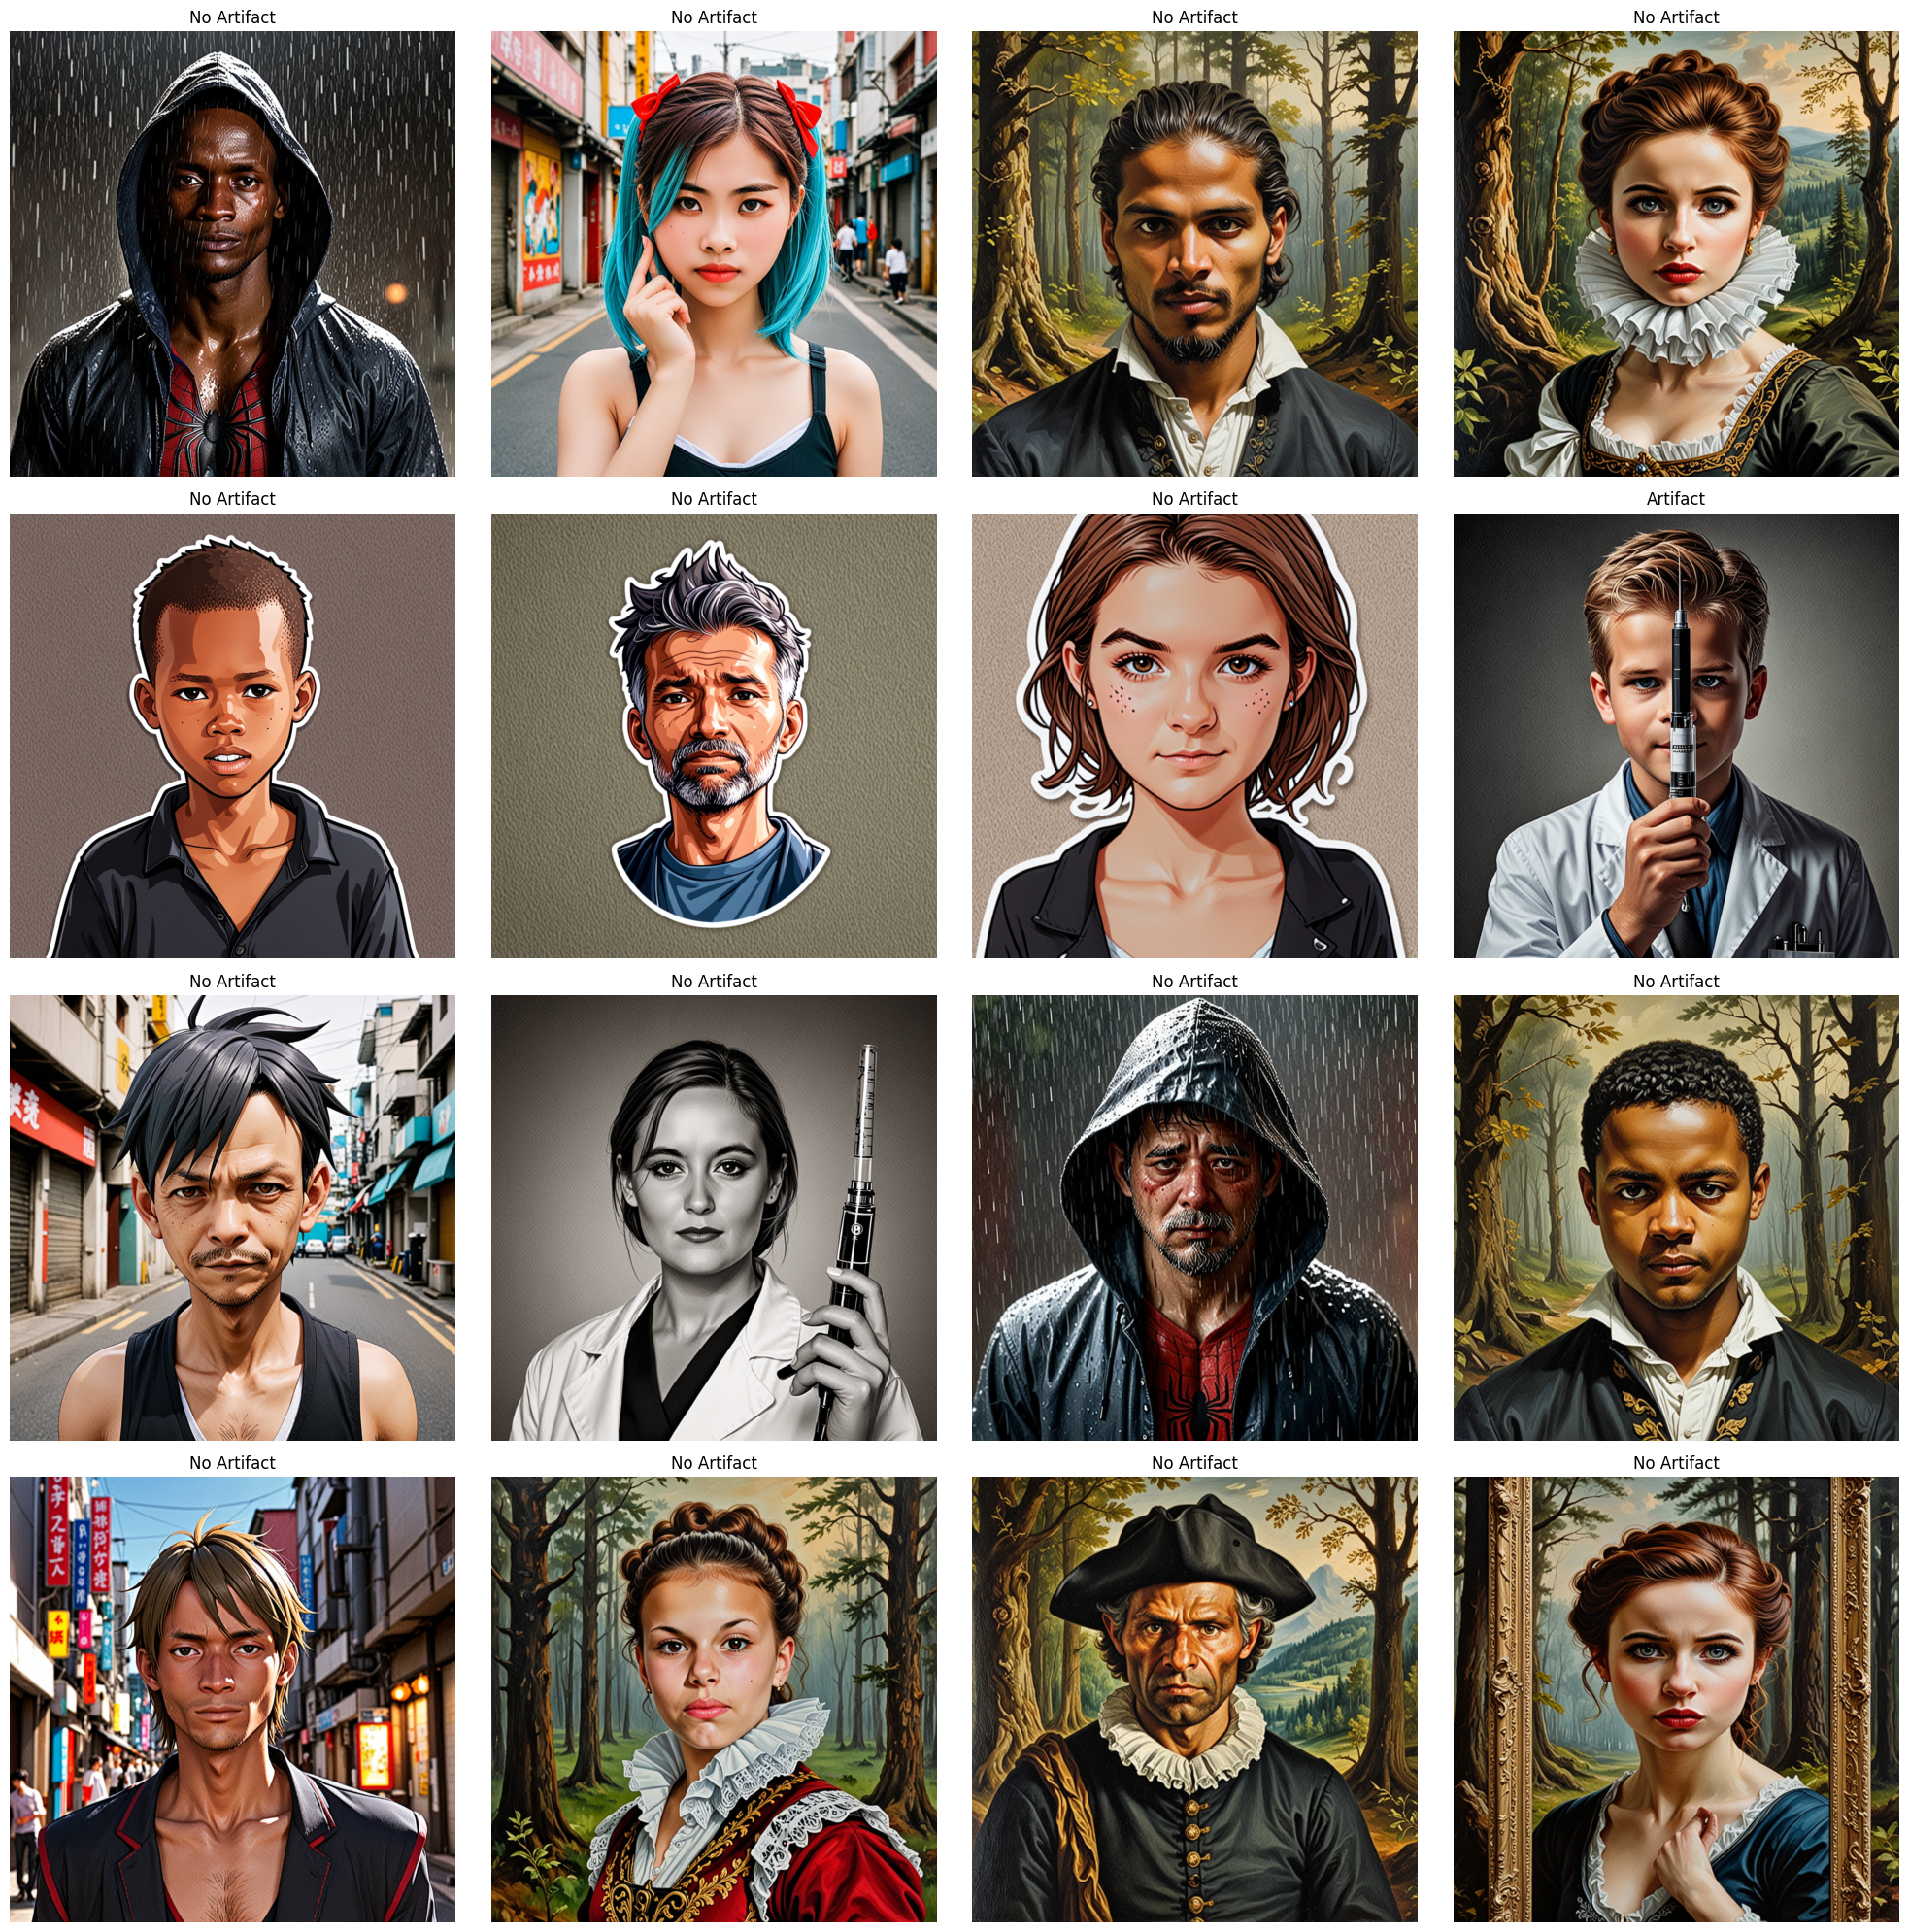

In [94]:
random_train_images = train_df.sample(n=16)
random_image_paths = random_train_images['image_path'].tolist()
random_labels = random_train_images['label'].tolist()

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
ax = ax.flatten()

for index, (img_path, label) in enumerate(zip(random_image_paths, random_labels)):
    img = Image.open(img_path)
    
    ax[index].imshow(np.array(img))
    ax[index].set_title(CLASS_NAMES[label])
    ax[index].axis('off')

plt.tight_layout()
plt.show()

### Train class Distribution

In [95]:
train_artiffacts_count = train_df[train_df["label"] == 0].shape[0]
train_no_artiffacts_count = train_df[train_df["label"] == 1].shape[0]

In [96]:
print(train_artiffacts_count, train_no_artiffacts_count)

180 1620


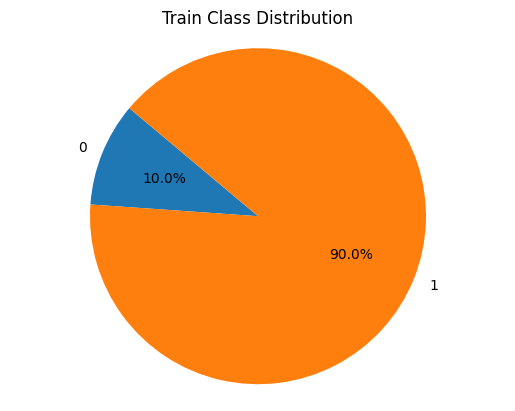

In [97]:
plt.pie([train_artiffacts_count, train_no_artiffacts_count], labels=CLASS_LABELS, autopct='%1.1f%%', startangle=140)
plt.title('Train Class Distribution')
plt.axis('equal')
plt.show()

In [98]:
print(train_df['label'].value_counts(normalize=True))

label
1    0.9
0    0.1
Name: proportion, dtype: float64


### Test class Distribution

In [99]:
test_artiffacts_count = test_df[test_df["label"] == 0].shape[0]
test_no_artiffacts_count = test_df[test_df["label"] == 1].shape[0]

In [100]:
print(test_artiffacts_count, test_no_artiffacts_count)

20 180


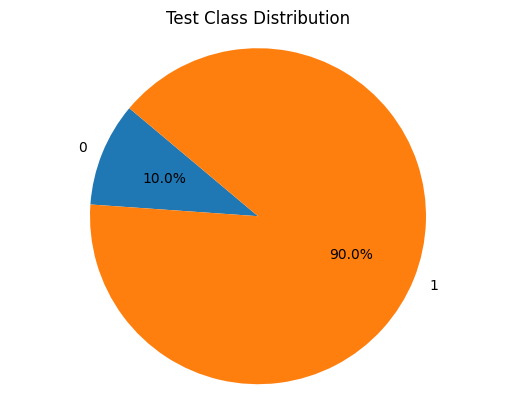

In [101]:

plt.pie([test_artiffacts_count, test_no_artiffacts_count], labels=CLASS_LABELS, autopct='%1.1f%%', startangle=140)
plt.title('Test Class Distribution')
plt.axis('equal')
plt.show()

In [102]:
print(test_df['label'].value_counts(normalize=True))

label
1    0.9
0    0.1
Name: proportion, dtype: float64


In [103]:
def get_image_size(path):
    with Image.open(path) as img:
        return img.size 

### Show train image sizes

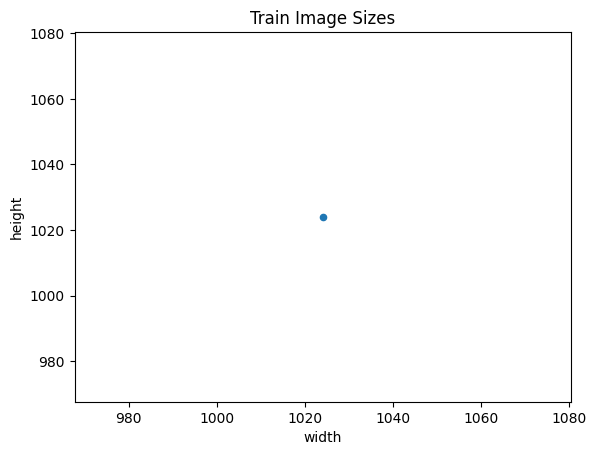

In [104]:
train_df['width'], train_df['height'] = zip(*train_df['image_path'].map(get_image_size))

sizes = train_df.groupby(['height', 'width']).size().reset_index(name='count')

sizes.plot.scatter(x='width', y='height')
plt.title(f'Train Image Sizes')
plt.show()

### Show test image sizes

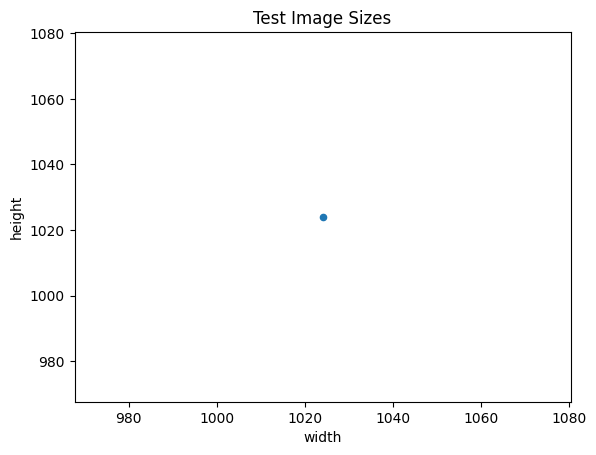

In [105]:
test_df['width'], test_df['height'] = zip(*test_df['image_path'].map(get_image_size))

sizes = test_df.groupby(['height', 'width']).size().reset_index(name='count')

sizes.plot.scatter(x='width', y='height')
plt.title(f'Test Image Sizes')
plt.show()